# Lecture on the hyperbolic triangle groups

## The hyperbolic plane

SageMath has some simple [classes for working with hyperbolic geometry](https://doc.sagemath.org/html/en/reference/hyperbolic_geometry/sage/geometry/hyperbolic_space/hyperbolic_point.html).

There are several models of the hyperbolic plane. We'll concentrate on the upper half plane. In this model, points are complex numbers $x+iy$ with $y > 0$. 

In [1]:
UHP = HyperbolicPlane().UHP()

In [2]:
pt = UHP.get_point(1+I)
pt

Point in UHP I + 1

The hyperbolic plane has a metric, and you can measure distances. For example:

In [3]:
pt1 = UHP.get_point(I)
pt2 = UHP.get_point(1 + 2*I)
pt1.dist(pt2)

arccosh(3/2)

In [4]:
pt1.dist(pt2).n()

0.962423650119207

If you are interested in a detailed understanding of this metric, you can look at one of the many books on Hyperbolic geometry such as:

* "Introduction to Hyperbolic Geometry" by John G. Ratcliffe

Mainly, we need to understand what the geodesics are: A *geodesic* is a distance minimizing path. In the upper half plane, geodesics are vertical lines and circles perpendicular to the $x$-axis.

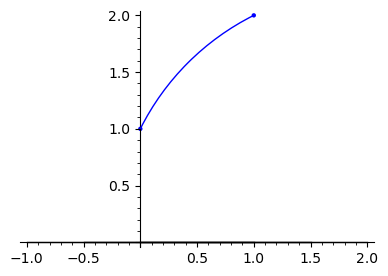

In [5]:
geodesic = UHP.get_geodesic(pt1, pt2)
show(geodesic.plot() + pt1.show() + pt2.show(), axes=True, figsize=4)

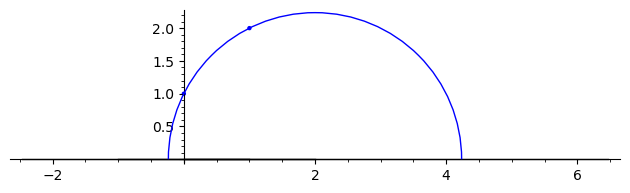

In [6]:
complete_geodesic = geodesic.complete()
show(complete_geodesic.plot() + pt1.show() + pt2.show(), axes=True)

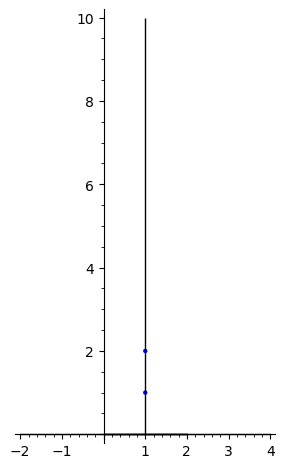

In [7]:
pt1 = UHP.get_point(1 + I)
pt2 = UHP.get_point(1 + 2*I)
geodesic = UHP.get_geodesic(pt1, pt2)
complete_geodesic = geodesic.complete()
show(complete_geodesic.plot() + pt1.show() + pt2.show(), axes=True)

## Hyperbolic isometries

The *Riemann sphere* is $\hat{\mathbb C} = \mathbb C \cup \{\infty\}$. Any sequence of complex numbers $\{z_n\}$ that satisfies $\lim_n |z_n|=+\infty$ is said to converge to $\infty$. This makes $\hat{\mathbb C}$ a topological sphere.

A *Möbius transformation* is a map $\hat{\mathbb C} \to \hat{\mathbb C}$ of the form
$$f(z) = \frac{az + b}{cz + d}, \quad \text{where } ad - bc \neq 0$$
where $a, b, c, d$ are complex constants. 

So a Möbius transformation is determined by an invertible matrix
$$M_f = \begin{pmatrix}
a & b \\
c & d
\end{pmatrix}.$$
Two invertible matrices $M_1$ and $M_2$ determine the same Möbius transformation if and only if there is a complex constant $\kappa$ such that $M_1 = \kappa M_2$. The map from matrices to Möbius transformation is a group homomorphism. That is, if $f_M$ denotes the Möbius transformation determined by $M$, then we have
$$f_{M \cdot N} = f_M \circ f_N.$$

Möbius transformations preserve the collection of all lines and circles in the complex plane. 

**Important observation:**
When $a,b,c,d \in \mathbb R$, the Möbius transformation preserves $\hat{\mathbb R}= \mathbb R \cup \{\infty\}$. If in addition $ad-bc > 0$, then the upper half plane is preserved and $f$ is orientation-preserving. These are all the orientation-preserving isometries of the upper half plane.

In [8]:
isom = UHP.get_isometry(matrix([
    [1, 2],
    [3, 7]
]))
isom

Isometry in UHP
[1 2]
[3 7]

In [9]:
isom(I)

Point in UHP 1/58*I + 17/58

To see the 

In [10]:
from sage.geometry.hyperbolic_space.hyperbolic_model import moebius_transform
mt(z) = moebius_transform(isom.matrix(), z)
mt

z |--> (z + 2)/(3*z + 7)

In [11]:
mt(I)

1/58*I + 17/58

Here we check the statement above that $f_{M \cdot N} = f_M \circ f_N.$

In [14]:
var('a b c d e f g h')
M = matrix(SR, [
    [a, b],
    [c, d],
])
N = matrix(SR, [
    [e, f],
    [g, h],
])
f_M(z) = moebius_transform(M, z)
f_N(z) = moebius_transform(N, z)
f_MN(z) = moebius_transform(M*N, z)

In [16]:
f_N

z |--> (e*z + f)/(g*z + h)

In [17]:
f_MN

z |--> (a*f + b*h + (a*e + b*g)*z)/(c*f + d*h + (c*e + d*g)*z)

In [18]:
eq = f_MN(z) == f_M(f_N(z))
bool(eq)

True

### Scaling maps:

A simple example of a hyperbolic isometry is given by a scaling map:
$$f(z) = a z \quad \text{for some $a>0$}.$$

### Rotations:

The standard rotation matrix is 
$$R = \begin{pmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{pmatrix}.$$
Consider the associated Möbius transformation:

In [20]:
var('theta', domain='real')
f(z) = ( cos(theta)*z - sin(theta) ) / ( sin(theta)*z + cos(theta) )
show(f)

z |--> (z*cos(theta) - sin(theta))/(z*sin(theta) + cos(theta))

We observe that $f$ preserves $i$:

In [21]:
f(I).full_simplify()

I

In other words, we $f$ rotates the upper half plane about $i$. But how?

Now note that when $\theta=\pi$, we have $R=-I$. The associated Möbius transformation is
$$f(z) = \frac{-z}{-1} = z,$$
so &ldquo;rotating&rdquo; by $\pi$ does nothing. More generally, you can see that the Möbius transformations associated to $\theta$ and $\theta+\pi$ are the same.

Now let us focus on the case when $\theta = \frac{\pi}{5}$:

In [23]:
rot = f.subs({cos(theta): QQbar(cos(pi/5)), sin(theta): QQbar(sin(pi/5))})
show(rot)

z |--> (0.8090169943749474?*z - 0.5877852522924731?)/(0.5877852522924731?*z + 0.8090169943749474?)

To see how it acts, consider the geodesic segment from $i$ to $2i$:

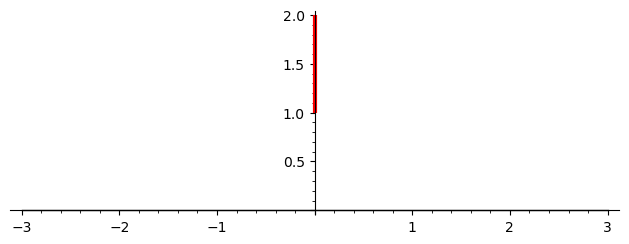

In [24]:
geod = UHP.get_geodesic(I, 2*I)
geod.plot(color='red', axes=True, thickness=3)

We add the image of `geod` under `rot`:

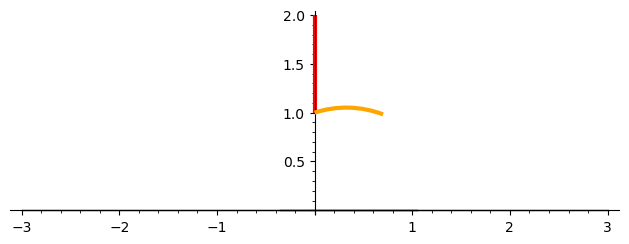

In [25]:
geod2 = UHP.get_geodesic(I, rot(2*I))
geod.plot(color='red', axes=True, thickness=3) + \
    geod2.plot(color='orange', axes=True, thickness=3)    

Sage's hyperbolic geometry package can also measure the angle between geodesics:

In [26]:
geod.angle(geod2)

arccos(0.3249196962329063?/sqrt(1.105572809000085?))

This angle is actually $\frac{2\pi}{5}$, as Sage can verify:

In [28]:
AA(cos(geod.angle(geod2))) == AA(cos(2*pi/5))

True

Here we plot the orbit of the segment `geod` under `rot`:

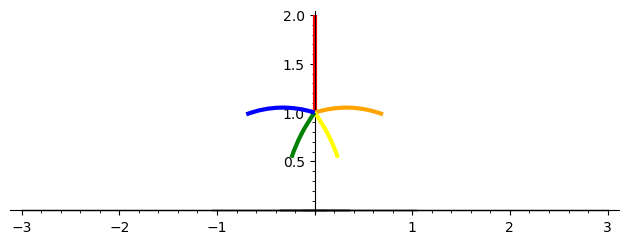

In [29]:
plt = geod.plot(color='red', axes=True, thickness=3)
pt = rot(2*I)
plt += UHP.get_geodesic(I, pt).plot(color='orange', axes=True, thickness=3)
pt = rot(pt)
plt += UHP.get_geodesic(I, pt).plot(color='yellow', axes=True, thickness=3)
pt = rot(pt)
plt += UHP.get_geodesic(I, pt).plot(color='green', axes=True, thickness=3)
pt = rot(pt)
plt += UHP.get_geodesic(I, pt).plot(color='blue', axes=True, thickness=3)
plt

In [30]:
bool(rot(pt) == 2*I)

True

**In general:** The rotation matrix $R$ defined in terms of $\theta$ rotates the upper half plane by $-2 \theta$ about $i$.

**Rotating about other points:** If $r(z)$ is the Mobius transformation determined by the rotation matrix with $\theta$, and $f(z)$ is another orientation-preserving isometry of the upper half plane, then 
$$z \mapsto f \circ r \circ f^{-1}(z)$$
will be an orientation preserving isometry that fixes $f(i)$ and rotates by $-2 \theta$ about this point.

**Furthermore:** Suppose a Mobius transformation $f_M$ is determined by a real matrix $M$ with determinant one. If the trace of $M$ satisfies
$$|\mathrm{trace}(M)| < 2,$$
then $f_M$ has a unique fixed point $z_0$. We also have that $|\mathrm{trace}(M)|=2 \cos \theta$ for some $\theta \in (0, \frac{\pi}{2}]$, and $f_M$ is a rotation by either $2 \theta$ or $-2 \theta$ about $z_0$.

## Hyperbolic triangles

In the hyperbolic plane, the sum of the angles of a triangle is always less than $\pi$. In fact, given three angles, $\alpha>0$, $\beta>0$ and $\gamma>0$ with $\alpha+\beta+\gamma < \pi$, we can construct a triangle with these angles.

First just consider $\alpha$ and $\beta$ with $\alpha+\beta < \pi$. I will explain how to construct a family of triangles with these angles. Choose two vertices: $A=i$ and $B=ai$ with $a>1$. We'll carry this out with $a=2$ below. These two points produce a geodesic $\overline{AB}$.

In [31]:
A = I
var('a', domain='positive')
a = 2
B = a*I
AB = UHP.get_geodesic(A, B).complete()
AB

Geodesic in UHP from 0 to +Infinity

Let us pick two angles:

In [32]:
alpha = pi/3
beta = 2*pi/5
bool(alpha+beta < pi)

True

We construct a clockwise rotation by $\alpha$ about $A$:

In [33]:
M_A = matrix(QQbar, [
    [ cos(alpha/2), -sin(alpha/2) ],
    [ sin(alpha/2),  cos(alpha/2) ]
])
M_A

[0.866025403784439?               -1/2]
[               1/2 0.866025403784439?]

In [34]:
r_A(z) = moebius_transform(M_A, z)
r_A

z |--> (0.866025403784439?*z - 1/2)/(1/2*z + 0.866025403784439?)

Then the segment $\overline{AC}$ will be:

In [35]:
AC = UHP.get_geodesic(A, r_A(B)).complete()
AC

Geodesic in UHP from -sqrt(1.333333333333334?) + 0.5773502691896258? to sqrt(1.333333333333334?) + 0.5773502691896258?

Similarly, we want to construct a counterclockwise rotation by $\beta$ about $B$. We do this in two steps. First, we construct this counterclockwise rotation about $A=i$:

In [36]:
M_I_beta = matrix(QQbar, [
    [ cos(-beta/2), -sin(-beta/2) ],
    [ sin(-beta/2),  cos(-beta/2) ]
])
M_I_beta

[ 0.8090169943749474?  0.5877852522924731?]
[-0.5877852522924731?  0.8090169943749474?]

In [37]:
r_I_beta(z) = moebius_transform(M_I_beta, z)
r_I_beta

z |--> (0.8090169943749474?*z + 0.5877852522924731?)/(-0.5877852522924731?*z + 0.8090169943749474?)

Now we construct an orientation preserving isometry carrying $A$ to $B$. We can just use scaling:

In [38]:
M_f = matrix(QQbar, [
    [ 2, 0 ],
    [ 0, 1 ]
])

In [39]:
f(z) = moebius_transform(M_f, z)
f

z |--> 2*z

We get the desired rotation about $B$ by $f \circ r_{I, \beta} \circ f^{-1}$.

In [40]:
M_B = M_f * M_I_beta * M_f.inverse()
M_B

[ 0.8090169943749474?   1.175570504584947?]
[-0.2938926261462366?  0.8090169943749474?]

In [41]:
r_B(z) = moebius_transform(M_B, z)
r_B

z |--> (0.8090169943749474?*z + 1.175570504584947?)/(-0.2938926261462366?*z + 0.8090169943749474?)

Now we can construct the line $\overline{BC}$:

In [42]:
BC = UHP.get_geodesic(B, r_B(A)).complete()
BC

Geodesic in UHP from -sqrt(4.422291236000337?) - 0.6498393924658126? to sqrt(4.422291236000337?) - 0.6498393924658126?

Now we can construct the point $C= \overline{AC} \cap \overline{BC}.$

In [43]:
C = QQbar(AC.intersection(BC)[0].coordinates())
C

1.222304951605076? + 0.957792665958411?*I

Here we draw the construction:

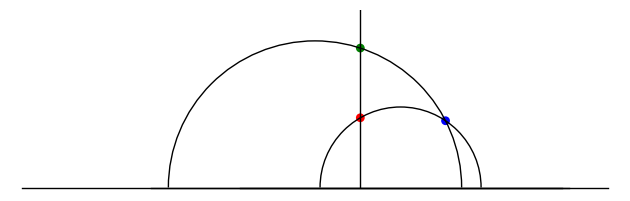

In [44]:
point(A, color='red', size=40, ymax=2.5) + \
    point(B, color='green', size=40) + \
    point(C, color='blue', size=40) + \
    AB.plot(color='black') + \
    AC.plot(color='black') + \
    BC.plot(color='black')

Now we'd like to compute the angle at $C$, ideally in terms of $a$ because $B=a i$.

Observe that $r_A^{-2}(C) = r_B^{-2}(C)$. We are not doing exact arithmetic, but we can observe this below:

In [45]:
r_A_inv(z) = moebius_transform(M_A.inverse(), z)
r_A_inv

z |--> (0.866025403784439?*z + 0.500000000000000?)/(-0.500000000000000?*z + 0.866025403784439?)

In [46]:
r_B_inv(z) = moebius_transform(M_B.inverse(), z)
r_B_inv

z |--> (0.8090169943749474?*z - 1.175570504584947?)/(0.2938926261462366?*z + 0.8090169943749474?)

In [47]:
C_prime = r_A_inv(r_A_inv(C))
C_prime

-1.222304951605076? + 0.957792665958411?*I

In [49]:
r_B_inv(r_B_inv(C))

-1.222304951605076? + 0.957792665958411?*I

In [50]:
C

1.222304951605076? + 0.957792665958411?*I

In [51]:
C_prime = -C.real() + QQbar(I)*C.imag()
C_prime

-1.222304951605076? + 0.957792665958411?*I

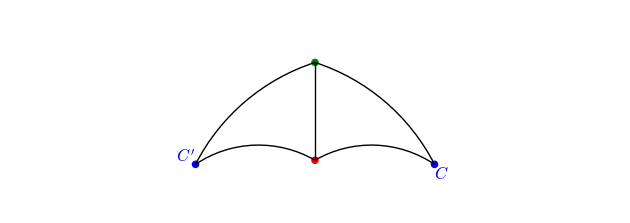

In [52]:
point(A, color='red', size=30, ymin=0.5, ymax=2.5) + \
    point(B, color='green', size=30) + \
    point(C, color='blue', size=30) + \
    text('$C$', (C.real(), C.imag()), fontsize='large', 
         horizontal_alignment='left', vertical_alignment='top') +\
    point(C_prime, color='blue', size=30) + \
    text('$C\'$', (C_prime.real(), C_prime.imag()), fontsize='large',
         horizontal_alignment='right', vertical_alignment='bottom') +\
    UHP.get_geodesic(A, B).plot(color='black') + \
    UHP.get_geodesic(A, C).plot(color='black') + \
    UHP.get_geodesic(B, C).plot(color='black') + \
    UHP.get_geodesic(A, C_prime).plot(color='black') + \
    UHP.get_geodesic(B, C_prime).plot(color='black')

Then the composition $g(z) = r_B^2 \circ r_A^{-2}(z)$ fixes $C$. By drawing more triangles, we will see that $g(z)$ rotates by $2 \gamma$ about $C$. Consider the point $A'=g(A)$. Since $g$ is an isometry that fixes $C$, we the following distances are equal:
$$d(A', C) = d\big(g(A), g(C)\big) = d(A, C).$$
Similarly, since $r_B$ and $r_A$ are isometries and $r_A$ fixes $A$ and $r_B$ fixes $B$:
$$d(A', B) = d\big(r_B^2 \circ r_A^{-2}(A), B\big) = d\big(r_B^2(A), B\big) = d\big(A, r_B^{-2}(B)\big) = d(A, B).$$

In [54]:
g(z) = moebius_transform(M_B^2 * M_A^-2, z)
g

z |--> (-1.492769709905190?*z + 1.218673083624971?)/(-0.5053806964036059?*z - 0.2573110545856923?)

In [58]:
print(CDF(g(C)))
print(CDF(QQbar(C)))

1.222304951605076 + 0.9577926659584104*I
1.222304951605076 + 0.9577926659584104*I


In [61]:
A_prime = g(A)
A_prime

1.370688455396611? + 3.109272646885164?*I

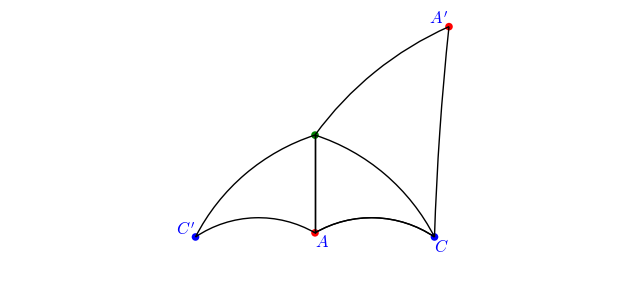

In [62]:
point(A, color='red', size=30, ymin=0.5, ymax=3.2) + \
    text('$A$', (A.real(), A.imag()), fontsize='large', 
         horizontal_alignment='left', vertical_alignment='top') +\
    point(A_prime, color='red', size=30) + \
    text('$A\'$', (A_prime.real(), A_prime.imag()), fontsize='large',
         horizontal_alignment='right', vertical_alignment='bottom') +\
    point(B, color='green', size=30) + \
    point(C, color='blue', size=30) + \
    text('$C$', (C.real(), C.imag()), fontsize='large', 
         horizontal_alignment='left', vertical_alignment='top') +\
    point(C_prime, color='blue', size=30) + \
    text('$C\'$', (C_prime.real(), C_prime.imag()), fontsize='large',
         horizontal_alignment='right', vertical_alignment='bottom') +\
    UHP.get_geodesic(A, B).plot(color='black') + \
    UHP.get_geodesic(A, C).plot(color='black') + \
    UHP.get_geodesic(B, C).plot(color='black') + \
    UHP.get_geodesic(A, C_prime).plot(color='black') + \
    UHP.get_geodesic(B, C_prime).plot(color='black') + \
    UHP.get_geodesic(A, B).plot(color='black') + \
    UHP.get_geodesic(A, C).plot(color='black') + \
    UHP.get_geodesic(A_prime, B).plot(color='black') + \
    UHP.get_geodesic(A_prime, C).plot(color='black')

Since $g(C)=C$ and $g(A)=A'$, we see that $g(z) = r_B^2 \circ r_A^{-2}(z)$ rotates by $2 \gamma$ in the clockwise direction about $C$. We can then figure out $\gamma$, because a matrix for $g$ is:

In [63]:
M_g = M_B^2 * M_A^-2
M_g

[ -1.492769709905190?   1.218673083624971?]
[-0.5053806964036059? -0.2573110545856923?]

This matrix has determinant $1$:

In [64]:
M_g.det()

1.000000000000000?

And the absolute value of the trace is:

In [65]:
trace_abs = abs(M_g.trace())
trace_abs

1.750080764490883?

This is less than two so we have:

In [66]:
gamma = arccos(trace_abs/2)
gamma

arccos(0.8750403822454412?)

In [67]:
(gamma/pi*180).n()

28.9502447867953

In [68]:
bool(alpha + beta + gamma < pi)

True

In [69]:
(alpha + beta + gamma).n()

2.80911170342042

### Computation of $a$

Once we know $A=i$, $B=ai$, and the angles $\alpha$ and $\beta$ we get the point $C$ and the angle $\gamma$ as above.

If instead we are given $\alpha$, $\beta$, and $\gamma$, we can try to find an $a$ such that $A=i$, $B=ai$ and $C$ as above have the prescribed angles. From the above, we just need to check that 
$$|\mathrm{trace}(M_B^2 \cdot M_A^{-2})|=2 \cos (\gamma).$$

Here we carry out this calculation.

In [70]:
var('a alpha beta gamma')

(a, alpha, beta, gamma)

In [71]:
M_A_squared = matrix([
    [ cos(alpha), -sin(alpha) ],
    [ sin(alpha),  cos(alpha) ]
])
M_A_squared

[ cos(alpha) -sin(alpha)]
[ sin(alpha)  cos(alpha)]

In [74]:
M_f = matrix([
    [ a, 0 ],
    [ 0, 1 ]
])

In [75]:
M_I_beta_squared = matrix([
    [ cos(-beta), -sin(-beta) ],
    [ sin(-beta),  cos(-beta) ]
])
M_I_beta_squared

[ cos(-beta) -sin(-beta)]
[ sin(-beta)  cos(-beta)]

In [76]:
M_B_squared = M_f * M_I_beta_squared * M_f.inverse()

In [77]:
M_g = M_B_squared * M_A_squared.transpose()
M_g

[ a*sin(alpha)*sin(-beta) + cos(alpha)*cos(-beta) -a*cos(alpha)*sin(-beta) + cos(-beta)*sin(alpha)]
[-cos(-beta)*sin(alpha) + cos(alpha)*sin(-beta)/a  cos(alpha)*cos(-beta) + sin(alpha)*sin(-beta)/a]

In [78]:
eq = M_g.trace() == -2*cos(gamma)

In [81]:
solution = solve(eq, a, solution_dict=True)

In [82]:
sol1 = solution[0][a].full_simplify()
show(sol1)

(cos(alpha)*cos(beta) - sqrt(cos(alpha)^2*cos(beta)^2 - sin(alpha)^2*sin(beta)^2 + 2*cos(alpha)*cos(beta)*cos(gamma) + cos(gamma)^2) + cos(gamma))/(sin(alpha)*sin(beta))

In [83]:
sol2 = solution[1][a].full_simplify()
show(sol2)

(cos(alpha)*cos(beta) + sqrt(cos(alpha)^2*cos(beta)^2 - sin(alpha)^2*sin(beta)^2 + 2*cos(alpha)*cos(beta)*cos(gamma) + cos(gamma)^2) + cos(gamma))/(sin(alpha)*sin(beta))

There is a solution with $a>1$ and another solution with $a<1$. (This can be seen geometrically. In fact the solutions have to multiply to one as we see below.)

In [84]:
(sol1*sol2).full_simplify()

1

Since we want the larger one, we choose the solution with the positive root.

In [85]:
sol2

(cos(alpha)*cos(beta) + sqrt(cos(alpha)^2*cos(beta)^2 - sin(alpha)^2*sin(beta)^2 + 2*cos(alpha)*cos(beta)*cos(gamma) + cos(gamma)^2) + cos(gamma))/(sin(alpha)*sin(beta))

In [86]:
def a_from_angles(alpha, beta, gamma):
    return QQbar((cos(alpha)*cos(beta) + sqrt(cos(alpha)^2*cos(beta)^2 - sin(alpha)^2*sin(beta)^2 + 2*cos(alpha)*cos(beta)*cos(gamma) + cos(gamma)^2) + cos(gamma))/(sin(alpha)*sin(beta)))

In [88]:
a = a_from_angles(pi/2, pi/3, pi/7)
a

1.327275245711059? + 0.?e-18*I

We can also find the coordinates for $C$ using the algorithm above.

In [90]:
def C_from_a_and_angles(a, alpha, beta):
    UHP = HyperbolicPlane().UHP()
    A = QQbar(I)
    B = QQbar(a*I)
    M_A = matrix(QQbar, [
        [ cos(alpha/2), -sin(alpha/2) ],
        [ sin(alpha/2),  cos(alpha/2) ]
    ])
    r_A(z) = moebius_transform(M_A, z)
    AC = UHP.get_geodesic(A, QQbar(r_A(B))).complete()
    M_I_beta = matrix(QQbar, [
        [ cos(-beta/2), -sin(-beta/2) ],
        [ sin(-beta/2),  cos(-beta/2) ]
    ])
    M_f = matrix(QQbar, [
        [ a, 0 ],
        [ 0, 1 ]
    ])
    M_B = M_f * M_I_beta * M_f.inverse()
    r_B(z) = moebius_transform(M_B, z)
    BC = UHP.get_geodesic(B, QQbar(r_B(A))).complete()
    C = QQbar(AC.intersection(BC)[0].coordinates())
    return C

In [91]:
A = QQbar(I)
B = QQbar(a*I)
C = C_from_a_and_angles(a, pi/2, pi/3)
print(C)

0.4969704253951809? + 0.867767478235117?*I


In [92]:
C_prime = -C.real() + I*QQbar(C.imag())

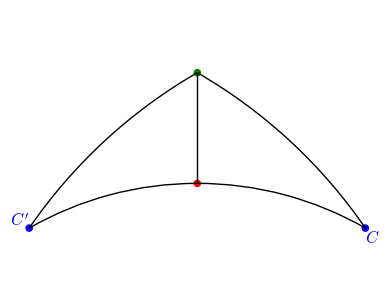

In [93]:
point(A, color='red', size=30, ymin=0.75, ymax=1.5, xmin=-1/2, xmax=1/2, figsize=4) + \
    point(B, color='green', size=30) + \
    point(C, color='blue', size=30) + \
    text('$C$', (C.real(), C.imag()), fontsize='large', 
         horizontal_alignment='left', vertical_alignment='top') +\
    point(C_prime, color='blue', size=30) + \
    text('$C\'$', (C_prime.real(), C_prime.imag()), fontsize='large',
         horizontal_alignment='right', vertical_alignment='bottom') +\
    UHP.get_geodesic(A, B).plot(color='black') + \
    UHP.get_geodesic(A, C).plot(color='black') + \
    UHP.get_geodesic(B, C).plot(color='black') + \
    UHP.get_geodesic(A, C_prime).plot(color='black') + \
    UHP.get_geodesic(B, C_prime).plot(color='black')

## Drawing the triangle tiling

We will use Numpy and the Python imaging library.

In [94]:
import numpy as np
from PIL import Image, ImagePalette

First we must get our math in order. Pick three angles all dividing $\pi$ evenly whose sum is less than $\pi$.

In [95]:
alpha = pi / 2
beta = pi / 3
gamma = pi / 7

We then get points as above.

In [96]:
a = a_from_angles(alpha, beta, gamma)
A = QQbar(I)
B = QQbar(a*I)
C = QQbar(C_from_a_and_angles(a, alpha, beta))
C_prime = QQbar(-C.real() + I*QQbar(C.imag()))

We need to understand the boundary segments.

In [97]:
AC = UHP.get_geodesic(A, C).complete()
AC_endpts = [boundary_pt.coordinates() for boundary_pt in AC.endpoints()]
AC_endpts

[-1.000000000000000?, 1.000000000000000?]

In [98]:
AC_center = CDF(sum(AC_endpts)/2)
AC_radius = CDF(abs(AC_endpts[0] - AC_endpts[1])/2)
AC_center, AC_radius

(-2.168404344971009e-19, 1.0)

In [99]:
ACp_center = -AC_center
ACp_radius = AC_radius

In [100]:
BC = UHP.get_geodesic(B, C).complete()
BC_endpts = [boundary_pt.coordinates() for boundary_pt in BC.endpoints()]
BC_endpts

[-2.298908161200020?, 0.7663027204000064?]

In [101]:
BC_center = CDF(sum(BC_endpts)/2)
BC_radius = CDF(abs(BC_endpts[0] - BC_endpts[1])/2)
BC_center, BC_radius

(-0.7663027204000064, 1.5326054408000127)

In [102]:
BCp_center = -BC_center
BCp_radius = BC_radius

Consider the clockwise and counterclockwise rotations about $A$ and $B$ of angles $2 \alpha$ and $2 \beta$ respectively. These give rise to Mobius transformations. We give Python implementations so we can use them with Numpy.

In [103]:
cos_alpha = RDF(cos(alpha))
sin_alpha = RDF(sin(alpha))

In [104]:
def r_A_cw(z):
    return (cos_alpha*z - sin_alpha) / (sin_alpha*z + cos_alpha)
def r_A_ccw(z):
    return (cos_alpha*z + sin_alpha) / (-sin_alpha*z + cos_alpha)

In [105]:
M_I_beta = matrix(QQbar, [
    [ cos(beta), -sin(beta) ],
    [ sin(beta),  cos(beta) ]
])
M_f = matrix(QQbar, [
    [ a, 0 ],
    [ 0, 1 ]
])
M_B = matrix(RDF, M_f * M_I_beta * M_f.inverse())
M_B

[                0.5 -1.1494540806000098]
[ 0.6524836552048288                 0.5]

In [106]:
~M_B

[ 0.4999999999999999  1.1494540806000095]
[-0.6524836552048286  0.4999999999999999]

In [107]:
def r_B_cw(z):
    return (M_B[0,0] * z + M_B[0,1]) / (M_B[1,0] * z + M_B[1,1])
def r_B_ccw(z):
    return (M_B[0,0] * z + -M_B[0,1]) / (-M_B[1,0] * z + M_B[1,1])

In [111]:
scale = 100
width = 10*scale
height = 3*scale
rect_height = 2
rect_width = width/height*rect_height
rect_width

20/3

In [113]:
width

1000

In [114]:
height

300

In [116]:
y_ls = np.linspace(2+1/height, 1/height, height)
x_ls = np.linspace(-rect_width/2, rect_width/2, width)
xmesh, ymesh = np.meshgrid(x_ls,y_ls)
zmesh = xmesh + 1j *ymesh
zmesh

array([[-3.33333333+2.00333333j, -3.32665999+2.00333333j,
        -3.31998665+2.00333333j, ...,  3.31998665+2.00333333j,
         3.32665999+2.00333333j,  3.33333333+2.00333333j],
       [-3.33333333+1.99664437j, -3.32665999+1.99664437j,
        -3.31998665+1.99664437j, ...,  3.31998665+1.99664437j,
         3.32665999+1.99664437j,  3.33333333+1.99664437j],
       [-3.33333333+1.98995541j, -3.32665999+1.98995541j,
        -3.31998665+1.98995541j, ...,  3.31998665+1.98995541j,
         3.32665999+1.98995541j,  3.33333333+1.98995541j],
       ...,
       [-3.33333333+0.01671126j, -3.32665999+0.01671126j,
        -3.31998665+0.01671126j, ...,  3.31998665+0.01671126j,
         3.32665999+0.01671126j,  3.33333333+0.01671126j],
       [-3.33333333+0.0100223j , -3.32665999+0.0100223j ,
        -3.31998665+0.0100223j , ...,  3.31998665+0.0100223j ,
         3.32665999+0.0100223j ,  3.33333333+0.0100223j ],
       [-3.33333333+0.00333333j, -3.32665999+0.00333333j,
        -3.31998665+0.00333333

In [117]:
in_quad = (np.abs(zmesh - AC_center) >= AC_radius) & \
    (np.abs(zmesh + AC_center) >= AC_radius) & \
    (np.abs(zmesh - BC_center) <= BC_radius) & \
    (np.abs(zmesh + BC_center) <= BC_radius)
color = np.where(in_quad, np.uint8(1), np.uint8(0)) * \
    np.where(zmesh.real >= 0, np.uint8(2), np.uint8(1))
color

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

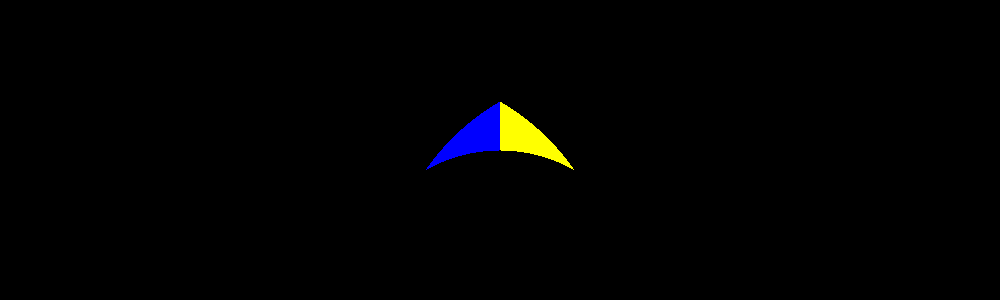

In [118]:
img = Image.fromarray(color, mode='P')
palette = [
       0,   0,   0, # Each triple is the amount of red, green and blue
       0,   0,  255, # as numbers 0 - 255 # RED
     255,   255,  0, # as numbers 0 - 255 # RED
]
img_palette = ImagePalette.ImagePalette("RGB", palette)
img.putpalette(img_palette)
img

In [120]:
zmeshr = zmesh.ravel()

In [121]:
(zmesh0 == zmeshr.reshape(zmesh.shape)).all()

True

In [127]:
num_steps = 10
for i in range(num_steps):
    # Select entries with positive real part
    # Update these entries by applying r_A_ccw
    condition = (zmeshr.real >= 0) & (np.abs(zmeshr - AC_center) < AC_radius)
    zmeshr[condition] = r_A_ccw(zmeshr[condition])
    
    condition = (zmeshr.real >= 0) & (np.abs(zmeshr - BC_center) > BC_radius)
    zmeshr[condition] = r_B_cw(zmeshr[condition])

    condition = (zmeshr.real < 0) & (np.abs(zmeshr + AC_center) < AC_radius)
    zmeshr[condition] = r_A_cw(zmeshr[condition])

    condition = (zmeshr.real < 0) & (np.abs(zmeshr + BC_center) > BC_radius)
    zmeshr[condition] = r_B_ccw(zmeshr[condition])


In [128]:
in_quad = (np.abs(zmesh - AC_center) >= AC_radius) & \
    (np.abs(zmesh + AC_center) >= AC_radius) & \
    (np.abs(zmesh - BC_center) <= BC_radius) & \
    (np.abs(zmesh + BC_center) <= BC_radius)

In [129]:
color = np.where(in_quad, np.uint8(1), np.uint8(0)) * \
    np.where(zmesh.real >= 0, np.uint8(2), np.uint8(1))
color

array([[1, 1, 2, ..., 1, 2, 2],
       [1, 1, 2, ..., 1, 2, 2],
       [1, 1, 2, ..., 1, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

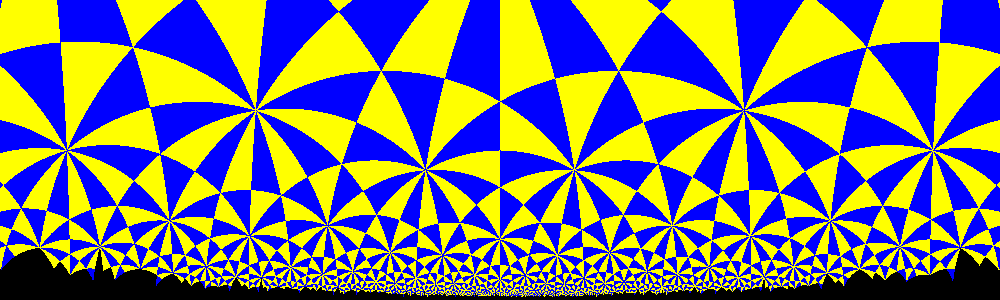

In [130]:
img = Image.fromarray(color, mode='P')
palette = [
       0,   0,   0, # Each triple is the amount of red, green and blue
       0,   0,  255, # as numbers 0 - 255 # RED
     255,   255,  0, # as numbers 0 - 255 # RED
]
img_palette = ImagePalette.ImagePalette("RGB", palette)
img.putpalette(img_palette)
img

In [131]:
def draw_triangulation(n1, n2, n3, scale=100, ymax=2, num_steps = 30):
    alpha = pi / n1
    beta = pi / n2
    gamma = pi / n3
    assert alpha + beta + gamma < pi

    a = a_from_angles(alpha, beta, gamma)
    A = QQbar(I)
    B = QQbar(a*I)
    C = QQbar(C_from_a_and_angles(a, alpha, beta))
    C_prime = QQbar(-C.real() + I*QQbar(C.imag()))
    
    AC = UHP.get_geodesic(A, C).complete()
    AC_endpts = [boundary_pt.coordinates() for boundary_pt in AC.endpoints()]
    
    AC_center = CDF(sum(AC_endpts)/2)
    AC_radius = CDF(abs(AC_endpts[0] - AC_endpts[1])/2)
        
    BC = UHP.get_geodesic(B, C).complete()
    BC_endpts = [boundary_pt.coordinates() for boundary_pt in BC.endpoints()]
    
    BC_center = CDF(sum(BC_endpts)/2)
    BC_radius = CDF(abs(BC_endpts[0] - BC_endpts[1])/2)
        
    cos_alpha = RDF(cos(alpha))
    sin_alpha = RDF(sin(alpha))
    
    def r_A_cw(z):
        return (cos_alpha*z - sin_alpha) / (sin_alpha*z + cos_alpha)
    def r_A_ccw(z):
        return (cos_alpha*z + sin_alpha) / (-sin_alpha*z + cos_alpha)
    
    M_I_beta = matrix(QQbar, [
        [ cos(beta), -sin(beta) ],
        [ sin(beta),  cos(beta) ]
    ])
    M_f = matrix(QQbar, [
        [ a, 0 ],
        [ 0, 1 ]
    ])
    M_B = matrix(RDF, M_f * M_I_beta * M_f.inverse())
    
    def r_B_cw(z):
        return (M_B[0,0] * z + M_B[0,1]) / (M_B[1,0] * z + M_B[1,1])
    def r_B_ccw(z):
        return (M_B[0,0] * z + -M_B[0,1]) / (-M_B[1,0] * z + M_B[1,1])
    
    width = 10*scale
    height = 3*scale
    rect_height = ymax
    rect_width = width/height*rect_height
    
    y_ls = np.linspace(ymax+1/height, 1/height, height)
    x_ls = np.linspace(-rect_width/2, rect_width/2, width)
    xmesh, ymesh = np.meshgrid(x_ls,y_ls)
    zmesh = xmesh + 1j *ymesh
    zmeshr = zmesh.ravel()
    
    for i in range(num_steps):
        # Select entries with positive real part
        # Update these entries by applying r_A_ccw
        condition = (zmeshr.real >= 0) & (np.abs(zmeshr - AC_center) < AC_radius)
        zmeshr[condition] = r_A_ccw(zmeshr[condition])
        
        condition = (zmeshr.real >= 0) & (np.abs(zmeshr - BC_center) > BC_radius)
        zmeshr[condition] = r_B_cw(zmeshr[condition])
    
        condition = (zmeshr.real < 0) & (np.abs(zmeshr + AC_center) < AC_radius)
        zmeshr[condition] = r_A_cw(zmeshr[condition])
    
        condition = (zmeshr.real < 0) & (np.abs(zmeshr + BC_center) > BC_radius)
        zmeshr[condition] = r_B_ccw(zmeshr[condition])
    
    
    in_quad = (np.abs(zmesh - AC_center) >= AC_radius) & \
        (np.abs(zmesh + AC_center) >= AC_radius) & \
        (np.abs(zmesh - BC_center) <= BC_radius) & \
        (np.abs(zmesh + BC_center) <= BC_radius)
    
    color = np.where(in_quad, np.uint8(1), np.uint8(0)) * \
        np.where(zmesh.real >= 0, np.uint8(2), np.uint8(1))
    
    img = Image.fromarray(color, mode='P')
    palette = [
           0,   0,   0, # Each triple is the amount of red, green and blue
           0,   0,  255, # as numbers 0 - 255 # RED
         255,   255,  0, # as numbers 0 - 255 # RED
    ]
    img_palette = ImagePalette.ImagePalette("RGB", palette)
    img.putpalette(img_palette)
    return img

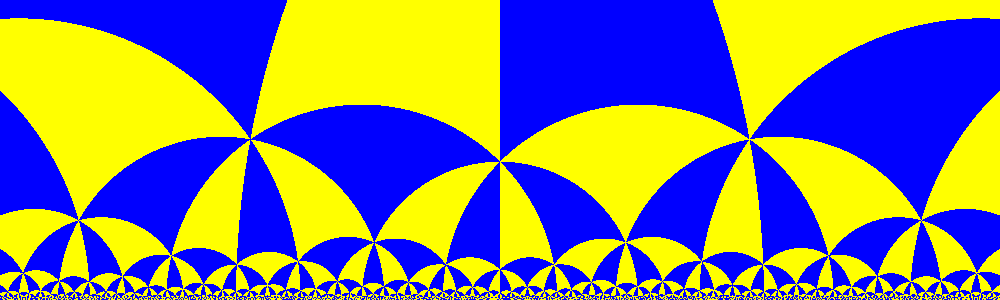

In [132]:
draw_triangulation(4,4,4, ymax=10)

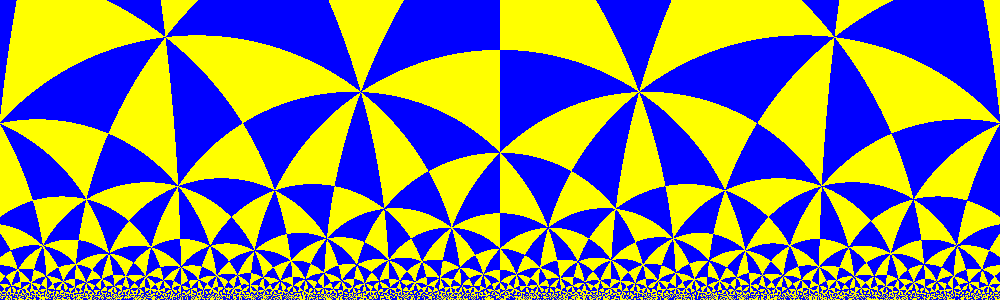

In [133]:
draw_triangulation(2, 4, 5, ymax=10)

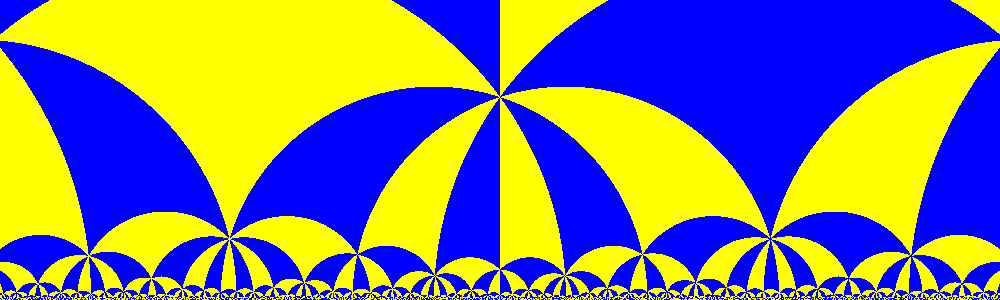

In [140]:
draw_triangulation(4, 5, 6, ymax=10)

Below, I save some of the images that are generated, at higher resolutions.

In [ ]:
n1 = 4
n2 = 4
n3 = 4
scale = 400
img = draw_triangulation(n1,n2,n3, ymax=10, scale=scale)
img.save(f'triangulation_{n1}_{n2}_{n3}_s{scale}.png')

In [144]:
n1 = 4
n2 = 4
n3 = 4
scale = 800
img = draw_triangulation(n1,n2,n3, ymax=10, scale=scale)
img.save(f'triangulation_{n1}_{n2}_{n3}_s{scale}.png')

In [145]:
n1 = 2
n2 = 3
n3 = 7
scale = 400
img = draw_triangulation(n1,n2,n3, ymax=10, scale=scale)
img.save(f'triangulation_{n1}_{n2}_{n3}_s{scale}.png')

In [146]:
n1 = 2
n2 = 3
n3 = 7
scale = 800
img = draw_triangulation(n1,n2,n3, ymax=10, scale=scale)
img.save(f'triangulation_{n1}_{n2}_{n3}_s{scale}.png')

In [147]:
n1 = 3
n2 = 3
n3 = 4
scale = 400
img = draw_triangulation(n1,n2,n3, ymax=10, scale=scale)
img.save(f'triangulation_{n1}_{n2}_{n3}_s{scale}.png')

In [148]:
n1 = 3
n2 = 3
n3 = 4
scale = 800
img = draw_triangulation(n1,n2,n3, ymax=10, scale=scale)
img.save(f'triangulation_{n1}_{n2}_{n3}_s{scale}.png')

In [149]:
n1 = 2
n2 = 4
n3 = 5
scale = 400
img = draw_triangulation(n1,n2,n3, ymax=10, scale=scale)
img.save(f'triangulation_{n1}_{n2}_{n3}_s{scale}.png')

In [150]:
n1 = 2
n2 = 4
n3 = 5
scale = 800
img = draw_triangulation(n1,n2,n3, ymax=10, scale=scale)
img.save(f'triangulation_{n1}_{n2}_{n3}_s{scale}.png')